In [17]:
from matplotlib import pyplot as plt
import cv2
import os

(454, 825, 3)


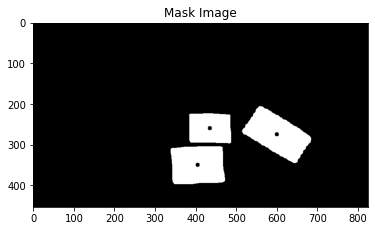

In [61]:
mask_image = cv2.imread('./mask_image_1.png', cv2.IMREAD_COLOR)
print(mask_image.shape)

plt.imshow(mask_image)
plt.title('Mask Image')
plt.show()

0.0


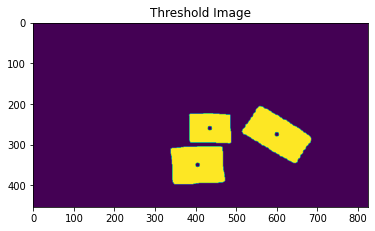

In [62]:
gray_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)
ret, thr_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_OTSU)
print(ret)

plt.imshow(gray_image)
plt.title('Threshold Image')
plt.show()


In [83]:
import numpy as np
import math

def get_line_length(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2+(y2-y1)**2)



((405.4462890625, 350.3896789550781), (129.99307250976562, 92.00526428222656), -2.7702159881591797)
coordinate #1: (405.4462890625, 350.3896789550781)
coordinate #2: (129.99307250976562, 92.00526428222656)
rotate angle: -2.7702159881591797
((405.0000305175781, 350.0), (11.31370735168457, 11.31370735168457), -45.0)
coordinate #1: (405.0000305175781, 350.0)
coordinate #2: (11.31370735168457, 11.31370735168457)
rotate angle: -45.0
((435.5, 260.5), (103.0, 73.0), 0.0)
coordinate #1: (435.5, 260.5)
coordinate #2: (103.0, 73.0)
rotate angle: 0.0
((435.00006103515625, 260.0000305175781), (11.31370735168457, 11.31370735168457), -45.0)
coordinate #1: (435.00006103515625, 260.0000305175781)
coordinate #2: (11.31370735168457, 11.31370735168457)
rotate angle: -45.0
((601.4412231445312, 275.76470947265625), (83.51982116699219, 159.66519165039062), -59.03623962402344)
coordinate #1: (601.4412231445312, 275.76470947265625)
coordinate #2: (83.51982116699219, 159.66519165039062)
rotate angle: -59.03623

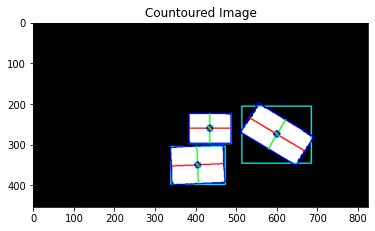

In [87]:


contours,_ = cv2.findContours(thr_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mask_image_copy = mask_image.copy()
for countour in contours:
    (x,y,w,h) = cv2.boundingRect(countour)
    cv2.rectangle(mask_image_copy, (x, y), (x + w, y + h), (0, 255, 255), 2)

    rect = cv2.minAreaRect(countour)
    print(rect)
    print('coordinate #1:', rect[0])
    print('coordinate #2:', rect[1])
    print('rotate angle:', rect[2])

    # get the rectangle coordinates of RotateRect
    box = cv2.boxPoints(rect)

    # to integer
    box = np.int0(box)

    # draw box
    cv2.drawContours(mask_image_copy,[box],0,(0,0,255),2)

    # draw center line
    xx1 = np.int0((box[0][0] + box[1][0])/2)
    yy1 = np.int0((box[0][1] + box[1][1])/2)
    xx2 = np.int0((box[2][0] + box[3][0])/2)
    yy2 = np.int0((box[2][1] + box[3][1])/2)

    len1 = get_line_length(xx1, yy1, xx2, yy2)

    xx3 = np.int0((box[0][0] + box[3][0])/2)
    yy3 = np.int0((box[0][1] + box[3][1])/2)
    xx4 = np.int0((box[2][0] + box[1][0])/2)
    yy4 = np.int0((box[2][1] + box[1][1])/2)  

    len2 = get_line_length(xx3, yy3, xx4, yy4)  
    
    if(len1 >= len2):
        color1 = (255, 0, 0)
        color2 = (0, 255, 0)
    else:
        color1 = (0, 255, 0)
        color2 = (255, 0, 0)

    cv2.line(mask_image_copy, (xx1, yy1), (xx2, yy2), color1, 2)
    cv2.line(mask_image_copy, (xx3, yy3), (xx4, yy4), color2, 2)



#cv2.rectangle(mask_image_copy, (x, y), (x + w, y + h), (0, 0, 255), 2)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# cv2.drawContours(mask_image_copy, [box], 0, (0, 0, 255), 2)

#cv2.drawContours(mask_image_copy, contours, -1, (0, 0, 255), 1)
plt.imshow(mask_image_copy)
plt.title('Countoured Image')
plt.show()
